In [2]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2023-07-13T20:50:45.948671-05:00

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.13.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [3]:
import pandas as pd

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12) # 10 pulgadas de ancho y 10 de alto para todos los plots

### Lectura de datos

In [5]:
consumidores = pd.read_csv("C:/Users/Danny/Desktop/Analisis tesis/Analisis exploratorio de datos/data/consumidores.2.limpio_analisis.csv")

In [6]:
consumidores.head()

,directorio,per_sexo,per_edad,vive_padre_hogar,vive_madre_hogar,departamento,municipio,tipo_vivienda,estrato,residentes_hogar,...,g_11_j_consumio_alguna_vez_heroina,g_11_j_anios_consumio_heroina,k_03_consumio_marihuana_12m,k_04_frecuencia_consumo_marihuana_12m,l_02_consumio_cocaina_12m,l_03_frecuencia_consumo_cocaina_12m,m_02_consumio_basuco_12m,m_03_frecuencia_consumo_basuco_12m,o_02_consumio_heroina_12m,o_03_frecuencia_consumo_heroina_12m
0,11207,1,19,2,2,Guaviare,SAN JOSÉ DEL GUAVIARE,2,2.0,5,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1180,2,51,2,1,Cordoba,MONTERÍA,1,1.0,4,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4398,1,52,3,3,Caqueta,FLORENCIA,1,2.0,4,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4399,2,39,1,1,Bolivar,CARTAGENA,1,5.0,6,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2619,2,27,1,1,Tolima,ESPINAL,1,2.0,4,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En este paso vamos a agregar aquellas variables que se puedan agregar en tipos más genéricos. Esto ayuda a analizar los por grupos en vez de por elementos individuales.

Para ello podemos ver el numero de valores distintos que cada variable categorica tiene

In [7]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))

unique_col_values(consumidores)

directorio | 10000 | int64
per_sexo | 2 | int64
per_edad | 54 | int64
vive_padre_hogar | 3 | int64
vive_madre_hogar | 3 | int64
departamento | 33 | object
municipio | 135 | object
tipo_vivienda | 4 | int64
estrato | 6 | float64
residentes_hogar | 14 | int64
d_01_aporta_dinero_hogar | 2 | int64
d_02_situacion_actual | 8 | int64
d_08_estado_salud | 5 | int64
d_09_deprimido | 2 | int64
d_10_poco_interes | 2 | int64
d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente | 5 | int64
d_11_k_conocimiento_riesgo_cocaina_frecuentemente | 5 | int64
d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente | 5 | int64
d_12_b_presenta_problema_consumo_sp_barrio | 2 | int64
d_12_c_presenta_problema_expendio_sp_barrio | 2 | int64
d2_01_etnia | 6 | int64
d2_03_estado_civil | 6 | int64
d2_04_num_hijos | 13 | int64
d2_05_nivel_educativo | 8 | int64
g_01_familiares_consumen_sp | 2 | int64
g_01_a_num_familiares_consumen_sp | 3 | float64
g_02_amigos_consumen_sp | 2 | int64
g_02_a_num_amigos_consumen_sp | 

In [8]:
consumidores.shape

(10000, 56)

In [8]:
consumidores.estrato.value_counts(normalize=False)

2.0    3755
1.0    2865
3.0    2547
4.0     555
5.0     170
6.0     108
Name: estrato, dtype: int64

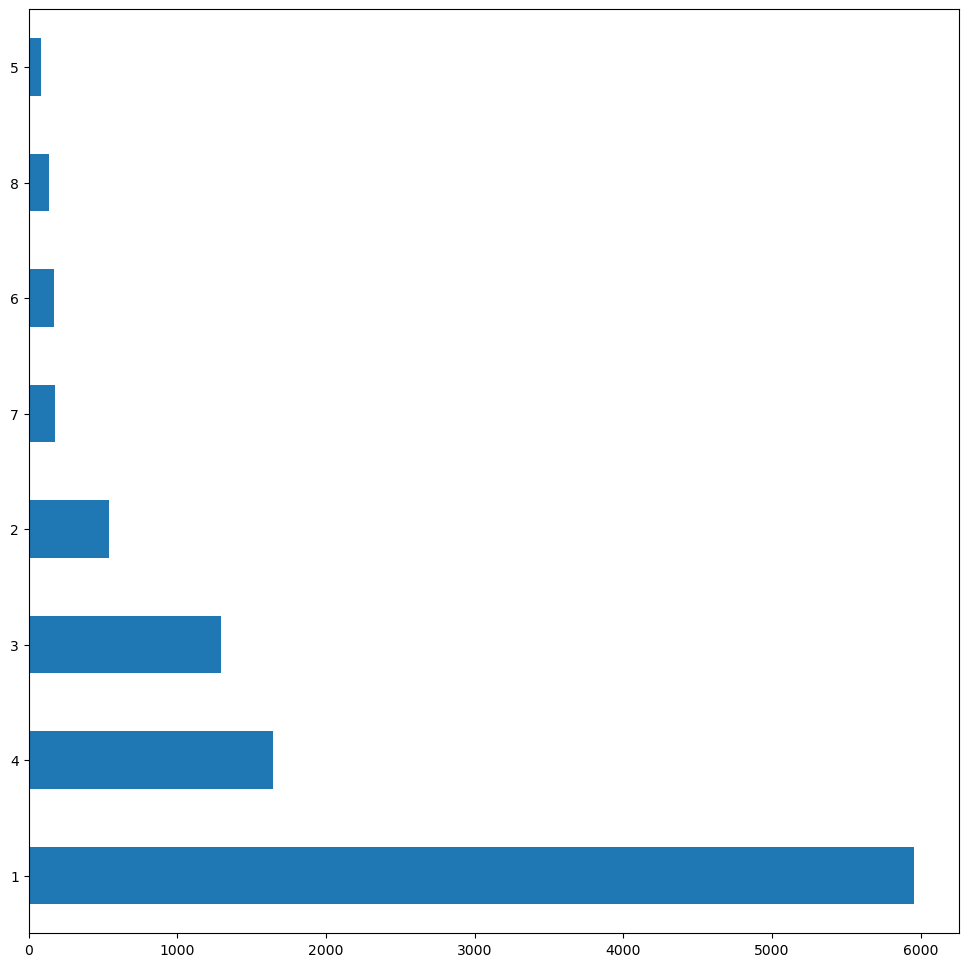

In [9]:
consumidores.d_02_situacion_actual.value_counts(normalize=False).plot.barh();

### Agrupacion de variables categoricas

##### Edad

In [10]:
consumidores.per_edad.unique()

array([19, 51, 52, 39, 27, 46, 38, 47, 55, 15, 57, 26, 30, 34, 28, 17, 24,
       23, 12, 36, 62, 53, 50, 20, 16, 29, 22, 60, 61, 40, 65, 63, 32, 59,
       25, 45, 42, 31, 37, 18, 21, 56, 58, 33, 13, 44, 35, 48, 14, 64, 43,
       49, 54, 41], dtype=int64)

In [11]:
def clasificar_edades(edad):
    if edad <= 18:
        return 'Adolescente'
    elif edad <= 27:
        return 'Joven'
    elif edad <= 59:
        return 'Adulto'
    else:
        return 'Persona mayor'
    
consumidores['per_edad_tipo'] = consumidores['per_edad'].apply(clasificar_edades)

In [12]:
consumidores.per_edad_tipo = consumidores.per_edad_tipo.astype("category")

In [13]:
consumidores.per_edad_tipo.dtype

CategoricalDtype(categories=['Adolescente', 'Adulto', 'Joven', 'Persona mayor'], ordered=False)

In [14]:
consumidores.per_edad_tipo.value_counts()

Adulto           5798
Joven            2458
Adolescente       902
Persona mayor     842
Name: per_edad_tipo, dtype: int64

##### Estrato

In [15]:
consumidores.estrato.unique()

array([2., 1., 5., 3., 6., 4.])

In [16]:
bajo = [1.0,2.0]
medio = [3.0 ,4.0]
alto = [5.0,6.0]

consumidores.loc[consumidores['estrato'].isin(bajo), 'estrato_tipo'] = 'Estrato bajo'

consumidores.loc[consumidores['estrato'].isin(medio), 'estrato_tipo'] = 'Estrato medio'

consumidores.loc[consumidores['estrato'].isin(alto), 'estrato_tipo'] = 'Estrato alto'

In [17]:
consumidores.estrato_tipo = consumidores.estrato_tipo.astype("category")

In [18]:
consumidores.estrato_tipo.dtype

CategoricalDtype(categories=['Estrato alto', 'Estrato bajo', 'Estrato medio'], ordered=False)

In [19]:
consumidores.estrato_tipo.value_counts()

Estrato bajo     6620
Estrato medio    3102
Estrato alto      278
Name: estrato_tipo, dtype: int64

##### Situacion Actual

In [20]:
consumidores.d_02_situacion_actual.unique()

array([1, 2, 7, 3, 4, 5, 8, 6], dtype=int64)

Vemos que las tracciones pueden definirse como 2 o 4 ruedas. las pongo como texto ya que en realidad no son variables numericas, sino categorias

In [21]:
otros=[4,5,6,7,8]

consumidores.loc[consumidores['d_02_situacion_actual']==1, 'situacion_tipo'] = 'Trabajando'

consumidores.loc[consumidores['d_02_situacion_actual']==2, 'situacion_tipo'] = 'Buscando trabajo'

consumidores.loc[consumidores['d_02_situacion_actual']==3, 'situacion_tipo'] = 'Estudiando'

consumidores.loc[consumidores['d_02_situacion_actual'].isin(otros), 'situacion_tipo'] = 'Otros'

In [22]:
consumidores.situacion_tipo = consumidores.situacion_tipo.astype("category")

In [23]:
consumidores.situacion_tipo.dtype

CategoricalDtype(categories=['Buscando trabajo', 'Estudiando', 'Otros', 'Trabajando'], ordered=False)

In [24]:
consumidores.situacion_tipo.value_counts()

Trabajando          5958
Otros               2204
Estudiando          1297
Buscando trabajo     541
Name: situacion_tipo, dtype: int64

##### Frecuancia consumo marihuana tipo

In [50]:
consumidores.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column                                                     Non-Null Count  Dtype   
---  ------                                                     --------------  -----   
 0   directorio                                                 10000 non-null  int64   
 1   per_sexo                                                   10000 non-null  int64   
 2   per_edad                                                   10000 non-null  int64   
 3   vive_padre_hogar                                           10000 non-null  int64   
 4   vive_madre_hogar                                           10000 non-null  int64   
 5   departamento                                               10000 non-null  object  
 6   municipio                                                  10000 non-null  object  
 7   tipo_vivienda                                              10000 non-null  int64   
 8

In [42]:
consumidores.loc[consumidores['g_11_f_consumio_alguna_vez_marihuana']==2, 'frecuencia_consumo_marihuana_tipo'] = 'Nunca'

consumidores['frecuencia_consumo_marihuana_tipo'][
    (consumidores['g_11_f_consumio_alguna_vez_marihuana']==1) & (consumidores['k_03_consumio_marihuana_12m']==2)
]='Alguna vez en su vida'

consumidores['frecuencia_consumo_marihuana_tipo'][
    (consumidores['g_11_f_consumio_alguna_vez_marihuana']==1) & (consumidores['k_03_consumio_marihuana_12m']==1) &
    (consumidores['k_04_frecuencia_consumo_marihuana_12m']==1)
]='Una vez en el año'

consumidores['frecuencia_consumo_marihuana_tipo'][
    (consumidores['g_11_f_consumio_alguna_vez_marihuana']==1) & (consumidores['k_03_consumio_marihuana_12m']==1) &
    (consumidores['k_04_frecuencia_consumo_marihuana_12m']==2)
]='Algunas veces durante los últimos 12 meses'

consumidores['frecuencia_consumo_marihuana_tipo'][
    (consumidores['g_11_f_consumio_alguna_vez_marihuana']==1) & (consumidores['k_03_consumio_marihuana_12m']==1) &
    (consumidores['k_04_frecuencia_consumo_marihuana_12m']==3)
]='Algunas veces mensualmente'

consumidores['frecuencia_consumo_marihuana_tipo'][
    (consumidores['g_11_f_consumio_alguna_vez_marihuana']==1) & (consumidores['k_03_consumio_marihuana_12m']==1) &
    (consumidores['k_04_frecuencia_consumo_marihuana_12m']==4)
]='Algunas veces semanalmente'

consumidores['frecuencia_consumo_marihuana_tipo'][
    (consumidores['g_11_f_consumio_alguna_vez_marihuana']==1) & (consumidores['k_03_consumio_marihuana_12m']==1) &
    (consumidores['k_04_frecuencia_consumo_marihuana_12m']==5)
]='Diariamente'


C:\Users\Danny\AppData\Local\Temp\ipykernel_14900\1717147672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumidores['frecuencia_consumo_marihuana_tipo'][
C:\Users\Danny\AppData\Local\Temp\ipykernel_14900\1717147672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumidores['frecuencia_consumo_marihuana_tipo'][
C:\Users\Danny\AppData\Local\Temp\ipykernel_14900\1717147672.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [43]:
consumidores.frecuencia_consumo_marihuana_tipo = consumidores.frecuencia_consumo_marihuana_tipo.astype("category")

In [44]:
consumidores.frecuencia_consumo_marihuana_tipo.dtype

CategoricalDtype(categories=['Alguna vez en su vida',
                  'Algunas veces durante los últimos 12 meses',
                  'Algunas veces mensualmente', 'Algunas veces semanalmente',
                  'Diariamente', 'Nunca', 'Una vez en el año'],
, ordered=False)

In [45]:
consumidores.frecuencia_consumo_marihuana_tipo.value_counts()

Nunca                                         6088
Alguna vez en su vida                         2725
Diariamente                                    330
Algunas veces durante los últimos 12 meses     299
Algunas veces semanalmente                     212
Algunas veces mensualmente                     203
Una vez en el año                              143
Name: frecuencia_consumo_marihuana_tipo, dtype: int64

##### Frecuancia consumo cocaina tipo

In [46]:
consumidores.loc[consumidores['g_11_g_consumio_alguna_vez_cocaina']==2, 'frecuencia_consumo_cocaina_tipo'] = 'Nunca'

consumidores['frecuencia_consumo_cocaina_tipo'][
    (consumidores['g_11_g_consumio_alguna_vez_cocaina']==1) & (consumidores['l_02_consumio_cocaina_12m']==2)
]='Alguna vez en su vida'

consumidores['frecuencia_consumo_cocaina_tipo'][
    (consumidores['g_11_g_consumio_alguna_vez_cocaina']==1) & (consumidores['l_02_consumio_cocaina_12m']==1) &
    (consumidores['l_03_frecuencia_consumo_cocaina_12m']==1)
]='Una vez en el año'

consumidores['frecuencia_consumo_cocaina_tipo'][
    (consumidores['g_11_g_consumio_alguna_vez_cocaina']==1) & (consumidores['l_02_consumio_cocaina_12m']==1) &
    (consumidores['l_03_frecuencia_consumo_cocaina_12m']==2)
]='Algunas veces durante los últimos 12 meses'

consumidores['frecuencia_consumo_cocaina_tipo'][
    (consumidores['g_11_g_consumio_alguna_vez_cocaina']==1) & (consumidores['l_02_consumio_cocaina_12m']==1) &
    (consumidores['l_03_frecuencia_consumo_cocaina_12m']==3)
]='Algunas veces mensualmente'

consumidores['frecuencia_consumo_cocaina_tipo'][
    (consumidores['g_11_g_consumio_alguna_vez_cocaina']==1) & (consumidores['l_02_consumio_cocaina_12m']==1) &
    (consumidores['l_03_frecuencia_consumo_cocaina_12m']==4)
]='Algunas veces semanalmente'

consumidores['frecuencia_consumo_cocaina_tipo'][
    (consumidores['g_11_g_consumio_alguna_vez_cocaina']==1) & (consumidores['l_02_consumio_cocaina_12m']==1) &
    (consumidores['l_03_frecuencia_consumo_cocaina_12m']==5)
]='Diariamente'

#consumidores.g_11_g_consumio_alguna_vez_cocaina
#consumidores.g_11_h_consumio_alguna_vez_basuco
#consumidores.g_11_j_consumio_alguna_vez_heroina

#consumidores.l_02_consumio_cocaina_12m
#consumidores.l_03_frecuencia_consumo_cocaina_12m
#consumidores.m_02_consumio_basuco_12m
#consumidores.m_03_frecuencia_consumo_basuco_12m
#consumidores.o_02_consumio_heroina_12m
#consumidores.o_03_frecuencia_consumo_heroina_12m

C:\Users\Danny\AppData\Local\Temp\ipykernel_14900\3571941364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumidores['frecuencia_consumo_cocaina_tipo'][
C:\Users\Danny\AppData\Local\Temp\ipykernel_14900\3571941364.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumidores['frecuencia_consumo_cocaina_tipo'][
C:\Users\Danny\AppData\Local\Temp\ipykernel_14900\3571941364.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c

In [47]:
consumidores.frecuencia_consumo_cocaina_tipo = consumidores.frecuencia_consumo_cocaina_tipo.astype("category")

In [48]:
consumidores.frecuencia_consumo_cocaina_tipo.dtype

CategoricalDtype(categories=['Alguna vez en su vida',
                  'Algunas veces durante los últimos 12 meses',
                  'Algunas veces mensualmente', 'Algunas veces semanalmente',
                  'Diariamente', 'Nunca', 'Una vez en el año'],
, ordered=False)

In [49]:
consumidores.frecuencia_consumo_cocaina_tipo.value_counts()

Nunca                                         9052
Alguna vez en su vida                          711
Algunas veces durante los últimos 12 meses      81
Algunas veces mensualmente                      47
Una vez en el año                               47
Algunas veces semanalmente                      44
Diariamente                                     18
Name: frecuencia_consumo_cocaina_tipo, dtype: int64

##### Frecuancia consumo basuco tipo

In [51]:
consumidores.loc[consumidores['g_11_h_consumio_alguna_vez_basuco']==2, 'frecuencia_consumo_basuco_tipo'] = 'Nunca'

consumidores['frecuencia_consumo_basuco_tipo'][
    (consumidores['g_11_h_consumio_alguna_vez_basuco']==1) & (consumidores['m_02_consumio_basuco_12m']==2)
]='Alguna vez en su vida'

consumidores['frecuencia_consumo_basuco_tipo'][
    (consumidores['g_11_h_consumio_alguna_vez_basuco']==1) & (consumidores['m_02_consumio_basuco_12m']==1) &
    (consumidores['m_03_frecuencia_consumo_basuco_12m']==1)
]='Una vez en el año'

consumidores['frecuencia_consumo_basuco_tipo'][
    (consumidores['g_11_h_consumio_alguna_vez_basuco']==1) & (consumidores['m_02_consumio_basuco_12m']==1) &
    (consumidores['m_03_frecuencia_consumo_basuco_12m']==2)
]='Algunas veces durante los últimos 12 meses'

consumidores['frecuencia_consumo_basuco_tipo'][
    (consumidores['g_11_h_consumio_alguna_vez_basuco']==1) & (consumidores['m_02_consumio_basuco_12m']==1) &
    (consumidores['m_03_frecuencia_consumo_basuco_12m']==3)
]='Algunas veces mensualmente'

consumidores['frecuencia_consumo_basuco_tipo'][
    (consumidores['g_11_h_consumio_alguna_vez_basuco']==1) & (consumidores['m_02_consumio_basuco_12m']==1) &
    (consumidores['m_03_frecuencia_consumo_basuco_12m']==4)
]='Algunas veces semanalmente'

consumidores['frecuencia_consumo_basuco_tipo'][
    (consumidores['g_11_h_consumio_alguna_vez_basuco']==1) & (consumidores['m_02_consumio_basuco_12m']==1) &
    (consumidores['m_03_frecuencia_consumo_basuco_12m']==5)
]='Diariamente'


#consumidores.g_11_h_consumio_alguna_vez_basuco
#consumidores.g_11_j_consumio_alguna_vez_heroina

#consumidores.m_02_consumio_basuco_12m
#consumidores.m_03_frecuencia_consumo_basuco_12m
#consumidores.o_02_consumio_heroina_12m
#consumidores.o_03_frecuencia_consumo_heroina_12m

C:\Users\Danny\AppData\Local\Temp\ipykernel_14900\2236165463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumidores['frecuencia_consumo_basuco_tipo'][
C:\Users\Danny\AppData\Local\Temp\ipykernel_14900\2236165463.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumidores['frecuencia_consumo_basuco_tipo'][
C:\Users\Danny\AppData\Local\Temp\ipykernel_14900\2236165463.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con

In [52]:
consumidores.frecuencia_consumo_basuco_tipo = consumidores.frecuencia_consumo_basuco_tipo.astype("category")

In [53]:
consumidores.frecuencia_consumo_basuco_tipo.dtype

CategoricalDtype(categories=['Alguna vez en su vida',
                  'Algunas veces durante los últimos 12 meses',
                  'Algunas veces mensualmente', 'Algunas veces semanalmente',
                  'Diariamente', 'Nunca', 'Una vez en el año'],
, ordered=False)

In [54]:
consumidores.frecuencia_consumo_basuco_tipo.value_counts()

Nunca                                         9699
Alguna vez en su vida                          249
Algunas veces durante los últimos 12 meses      14
Algunas veces semanalmente                      12
Diariamente                                     12
Algunas veces mensualmente                      11
Una vez en el año                                3
Name: frecuencia_consumo_basuco_tipo, dtype: int64

##### Frecuancia consumo heroina tipo

In [56]:
consumidores.loc[consumidores['g_11_j_consumio_alguna_vez_heroina']==2, 'frecuencia_consumo_heroina_tipo'] = 'Nunca'

consumidores['frecuencia_consumo_heroina_tipo'][
    (consumidores['g_11_j_consumio_alguna_vez_heroina']==1) & (consumidores['o_02_consumio_heroina_12m']==2)
]='Alguna vez en su vida'

consumidores['frecuencia_consumo_heroina_tipo'][
    (consumidores['g_11_j_consumio_alguna_vez_heroina']==1) & (consumidores['o_02_consumio_heroina_12m']==1) &
    (consumidores['o_03_frecuencia_consumo_heroina_12m']==1)
]='Una vez en el año'

consumidores['frecuencia_consumo_heroina_tipo'][
    (consumidores['g_11_j_consumio_alguna_vez_heroina']==1) & (consumidores['o_02_consumio_heroina_12m']==1) &
    (consumidores['o_03_frecuencia_consumo_heroina_12m']==2)
]='Algunas veces durante los últimos 12 meses'

consumidores['frecuencia_consumo_heroina_tipo'][
    (consumidores['g_11_j_consumio_alguna_vez_heroina']==1) & (consumidores['o_02_consumio_heroina_12m']==1) &
    (consumidores['o_03_frecuencia_consumo_heroina_12m']==3)
]='Algunas veces mensualmente'

consumidores['frecuencia_consumo_heroina_tipo'][
    (consumidores['g_11_j_consumio_alguna_vez_heroina']==1) & (consumidores['o_02_consumio_heroina_12m']==1) &
    (consumidores['o_03_frecuencia_consumo_heroina_12m']==4)
]='Algunas veces semanalmente'

consumidores['frecuencia_consumo_heroina_tipo'][
    (consumidores['g_11_j_consumio_alguna_vez_heroina']==1) & (consumidores['o_02_consumio_heroina_12m']==1) &
    (consumidores['o_03_frecuencia_consumo_heroina_12m']==5)
]='Diariamente'


#consumidores.g_11_j_consumio_alguna_vez_heroina

#consumidores.o_02_consumio_heroina_12m
#consumidores.o_03_frecuencia_consumo_heroina_12m

C:\Users\Danny\AppData\Local\Temp\ipykernel_14900\1345227874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumidores['frecuencia_consumo_heroina_tipo'][
C:\Users\Danny\AppData\Local\Temp\ipykernel_14900\1345227874.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumidores['frecuencia_consumo_heroina_tipo'][
C:\Users\Danny\AppData\Local\Temp\ipykernel_14900\1345227874.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c

In [57]:
consumidores.frecuencia_consumo_heroina_tipo = consumidores.frecuencia_consumo_heroina_tipo.astype("category")

In [58]:
consumidores.frecuencia_consumo_heroina_tipo.dtype

CategoricalDtype(categories=['Alguna vez en su vida',
                  'Algunas veces durante los últimos 12 meses', 'Diariamente',
                  'Nunca'],
, ordered=False)

In [59]:
consumidores.frecuencia_consumo_heroina_tipo.value_counts()

Nunca                                         9956
Alguna vez en su vida                           40
Algunas veces durante los últimos 12 meses       3
Diariamente                                      1
Name: frecuencia_consumo_heroina_tipo, dtype: int64

In [60]:
consumidores.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 63 columns):
 #   Column                                                     Non-Null Count  Dtype   
---  ------                                                     --------------  -----   
 0   directorio                                                 10000 non-null  int64   
 1   per_sexo                                                   10000 non-null  int64   
 2   per_edad                                                   10000 non-null  int64   
 3   vive_padre_hogar                                           10000 non-null  int64   
 4   vive_madre_hogar                                           10000 non-null  int64   
 5   departamento                                               10000 non-null  object  
 6   municipio                                                  10000 non-null  object  
 7   tipo_vivienda                                              10000 non-null  int64   
 8

##### G11 F Años Consumio marihuana

In [61]:
consumidores.g_11_f_anios_consumio_marihuana.unique()

array([nan, 40., 19., 14., 18., 15., 17., 20., 22., 16., 12., 26., 21.,
       30., 27., 25., 23., 24., 13., 10., 11., 43., 34., 39., 28., 41.,
       47.,  8., 29., 35.,  9., 33., 42., 38.,  6., 48.,  7., 36., 45.,
       32., 50., 56., 52., 55., 51.,  2., 31., 46.,  5., 60.])

Vemos que las transmisiones se pueden agregar en manual o automatica

Podemos filtrar un dataframes por varias condiciones a la vez. Para ello usamos el operador `&` entre ellas para indicar un `and` o un  `|` para indicar un `or`

In [32]:
#vehiculos['transmision_tipo'] = "Automatica"
#vehiculos['transmision_tipo'][
#    (vehiculos['transmision'].notnull()) & (vehiculos['transmision'].str.startswith('M'))
#] = "Manual"

In [33]:
#vehiculos.transmision_tipo = vehiculos.transmision_tipo.astype("category")

In [34]:
#vehiculos.transmision_tipo.dtype

In [35]:
#vehiculos.transmision_tipo.value_counts()

In [62]:
consumidores.head()

,directorio,per_sexo,per_edad,vive_padre_hogar,vive_madre_hogar,departamento,municipio,tipo_vivienda,estrato,residentes_hogar,...,m_03_frecuencia_consumo_basuco_12m,o_02_consumio_heroina_12m,o_03_frecuencia_consumo_heroina_12m,per_edad_tipo,estrato_tipo,situacion_tipo,frecuencia_consumo_marihuana_tipo,frecuencia_consumo_cocaina_tipo,frecuencia_consumo_basuco_tipo,frecuencia_consumo_heroina_tipo
0,11207,1,19,2,2,Guaviare,SAN JOSÉ DEL GUAVIARE,2,2.0,5,...,NaN,NaN,NaN,Joven,Estrato bajo,Trabajando,Nunca,Nunca,Nunca,Nunca
1,1180,2,51,2,1,Cordoba,MONTERÍA,1,1.0,4,...,NaN,NaN,NaN,Adulto,Estrato bajo,Trabajando,Nunca,Nunca,Nunca,Nunca
2,4398,1,52,3,3,Caqueta,FLORENCIA,1,2.0,4,...,NaN,NaN,NaN,Adulto,Estrato bajo,Trabajando,Nunca,Nunca,Nunca,Nunca
3,4399,2,39,1,1,Bolivar,CARTAGENA,1,5.0,6,...,NaN,NaN,NaN,Adulto,Estrato alto,Trabajando,Nunca,Nunca,Nunca,Nunca
4,2619,2,27,1,1,Tolima,ESPINAL,1,2.0,4,...,NaN,NaN,NaN,Joven,Estrato bajo,Buscando trabajo,Nunca,Nunca,Nunca,Nunca


Esto ya tiene más sentido! Ahora que tenemos los grupos guardamos el dataframe

<Axes: xlabel='per_edad', ylabel='d2_04_num_hijos'>

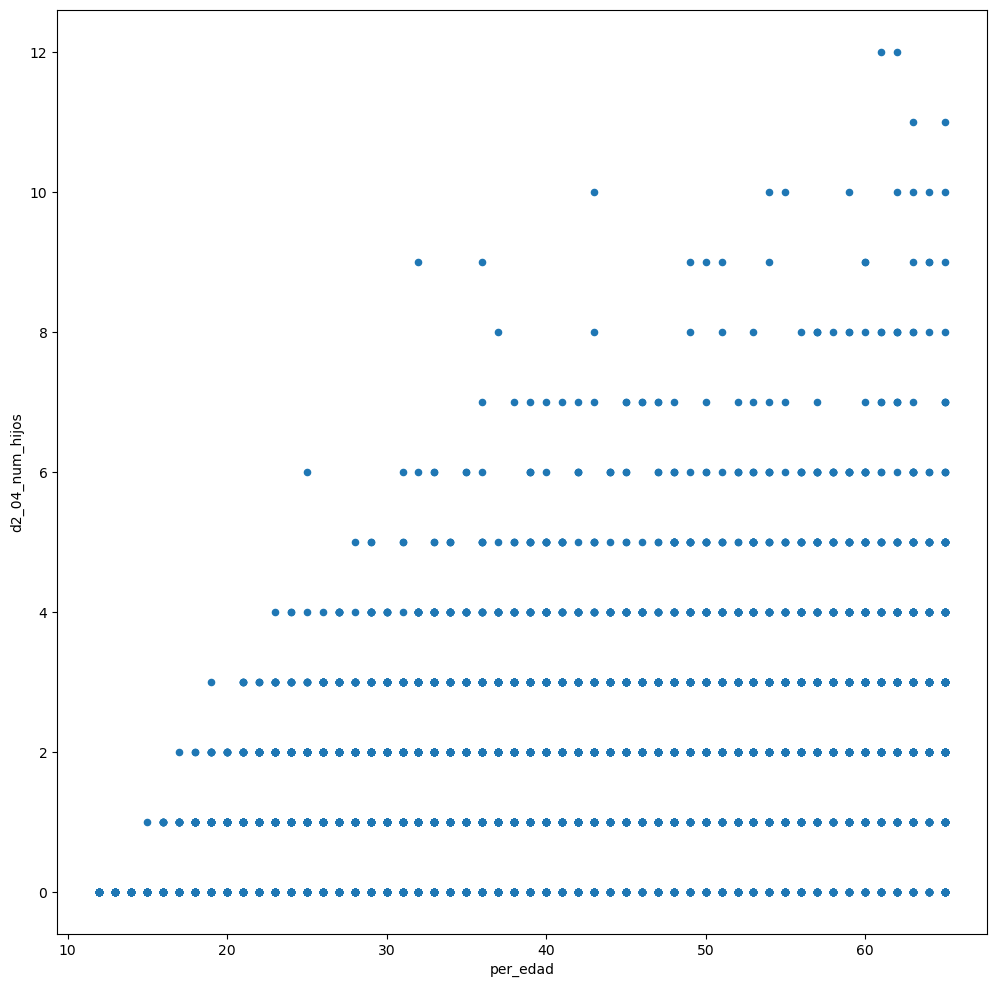

In [63]:
consumidores.plot.scatter(x="per_edad",y="d2_04_num_hijos")

In [64]:
consumidores.dtypes

directorio                              int64
per_sexo                                int64
per_edad                                int64
vive_padre_hogar                        int64
vive_madre_hogar                        int64
                                       ...   
situacion_tipo                       category
frecuencia_consumo_marihuana_tipo    category
frecuencia_consumo_cocaina_tipo      category
frecuencia_consumo_basuco_tipo       category
frecuencia_consumo_heroina_tipo      category
Length: 63, dtype: object

In [65]:
consumidores.head()

,directorio,per_sexo,per_edad,vive_padre_hogar,vive_madre_hogar,departamento,municipio,tipo_vivienda,estrato,residentes_hogar,...,m_03_frecuencia_consumo_basuco_12m,o_02_consumio_heroina_12m,o_03_frecuencia_consumo_heroina_12m,per_edad_tipo,estrato_tipo,situacion_tipo,frecuencia_consumo_marihuana_tipo,frecuencia_consumo_cocaina_tipo,frecuencia_consumo_basuco_tipo,frecuencia_consumo_heroina_tipo
0,11207,1,19,2,2,Guaviare,SAN JOSÉ DEL GUAVIARE,2,2.0,5,...,NaN,NaN,NaN,Joven,Estrato bajo,Trabajando,Nunca,Nunca,Nunca,Nunca
1,1180,2,51,2,1,Cordoba,MONTERÍA,1,1.0,4,...,NaN,NaN,NaN,Adulto,Estrato bajo,Trabajando,Nunca,Nunca,Nunca,Nunca
2,4398,1,52,3,3,Caqueta,FLORENCIA,1,2.0,4,...,NaN,NaN,NaN,Adulto,Estrato bajo,Trabajando,Nunca,Nunca,Nunca,Nunca
3,4399,2,39,1,1,Bolivar,CARTAGENA,1,5.0,6,...,NaN,NaN,NaN,Adulto,Estrato alto,Trabajando,Nunca,Nunca,Nunca,Nunca
4,2619,2,27,1,1,Tolima,ESPINAL,1,2.0,4,...,NaN,NaN,NaN,Joven,Estrato bajo,Buscando trabajo,Nunca,Nunca,Nunca,Nunca


### Conclusion

- Se categorizaron las variables necesarias como edad, estrato y situacion actual con el fin de mejorar los datos que se estan trabajando, la igual que se categorizan las variables relacionadas al consumo de cocaina basuco, mariuana y heroina para tener y entender de una mejor forma los datos, obteniendo asi las 4 variables categoricas a trabajar

### Exportar

Generalmente, un formato muy extendido para guardar datos es csv. Esto, que normalmente no es mala idea, no es recomendable entre pasos cuando se está trabajando con python y pandas.

CSV (o `Comma Separated Values`, es decir, Valores separados por comma), es un formato muy simple, que en general consiste de un elemento for fila, y cada campo separado por una coma.

El principal problema que esto tiene es que al guardar datos en csv se pierden todos los datos que pandas a obtenido sobre el dataframe (por ejemplo, que tipo de variable se guarda en cada columna, o que variables son categóricas).

Mi recomendación es usar un formato nativo de python para guardar dataframes entre pasos, y guardar los datos finales a un formato como csv, para que se puedan compartir con otras personas que no usen python.

El formato standard de serialización en Python (y serialización significa básicamente guardar un archivo al disco duro) es `pickle`. Pandas puede leer y escribir a pickle sin problemas, y al leer un archivo pickle es como si nunca hubiesemos cerrado el jupyter notebook, el dataframe no habrá perdido ninguna propiedad.

In [66]:
consumidores.to_pickle("C:/Users/Danny/Desktop/Analisis tesis/Analisis exploratorio de datos/data/consumidores.3.variables_agrupadas.pkl")